<hr>
<center> Learning Element for Control Systems - Autumn Semester 2024 <br>
<b> Learning Element 1: Solution </b> <br>
Prof. Dr. Florian Dörfler <br>
Automatic Control Laboratory, ETH Zurich </center>
<hr>

In this notebook, you will find different code fragments to complete Learning Element 1. <b>

<!-- <blockquote> -->
<b>Activity:</b> Execute the code cells below so that the necessary libraries get imported.
<!-- </blockquote> -->

In [2]:
import numpy as np # the standard library for numerics, vectors, matrices
import control as ct # the standard library for basic operations for analysis and design of feedback control systems
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import sympy as sp # the standard library for symbolic mathematical computations

<br>

<b> Code fragment for T1.1-i) linearization </b>

In [3]:
# define symbolic variables
x, y, z, xdot, ydot, zdot, phi, theta, psi, p, q, r = sp.symbols('x, y, z, xdot, ydot, zdot, phi, theta, psi, p, q, r')
u1,u2,u3,u4, = sp.symbols('u1, u2, u3, u4')
m, g, Ix, Iy, Iz, kx, ky, kz, kp, kq, kr = sp.symbols('m, g, Ix, Iy, Iz, kx, ky, kz, kp, kq, kr')
xd, yd, zd, psid = sp.symbols('xd, yd, zd, psid')

# define symbolic state, input & equilibrium vector
states = sp.Array([[x], [y], [z], [xdot], [ydot], [zdot], [phi], [theta], [psi], [p], [q], [r]])
inputs = sp.Array([[u1], [u2], [u3], [u4]])

# nonlinear model
xddot = 1/m*((sp.cos(phi)*sp.sin(theta)*sp.cos(psi)+sp.sin(phi)*sp.sin(psi))*u1-kx*xdot)
yddot = 1/m*((sp.cos(phi)*sp.sin(theta)*sp.sin(psi)-sp.sin(phi)*sp.cos(psi))*u1-ky*ydot)
zddot = 1/m*(sp.cos(phi)*sp.cos(theta)*u1-m*g-kz*zdot)

phidot = p+q*sp.sin(phi)*sp.tan(theta)+r*sp.cos(phi)*sp.tan(theta)
thetadot = q*sp.cos(phi)-r*sp.sin(phi)
psidot = q*sp.sin(phi)/sp.cos(theta)+r*sp.cos(phi)/sp.cos(theta)

pdot = 1/Ix*((Ix-Iz)*q*r+u2-kp*p)
qdot = 1/Iy*((Iz-Ix)*p*r+u3-kq*q)
rdot = 1/Iz*((Ix-Iy)*p*q+u4-kr*r)

In [4]:
# compute symbolic state-space matrices
drone = sp.Matrix([[xdot], [ydot], [zdot], [xddot], [yddot], [zddot], [phidot], [thetadot], [psidot], [pdot], [qdot], [rdot]])

# compute numeric state-space matrices with dtype float
A = drone.jacobian(states)
A_eval = A.evalf(subs={m:0.03, g:9.81, Ix:1.5*10**-5, Iy:1.5*10**-5, Iz:3*10**-5, psid:np.pi/4, kx:4.5*10**-3, ky:4.5*10**-3, kz:4.5*10**-3, 
                  kp:4.5*10**-4, kq:4.5*10**-4, kr:4.5*10**-4, xd:1, yd:1, zd:1, phi:0, p:0, q:0, r:0, xdot:0, ydot:0, zdot:0, theta:0, u1:m*g, psi:psid})

B = drone.jacobian(inputs)
B_eval = B.evalf(subs={m:0.03, g:9.81, Ix:1.5*10**-5, Iy:1.5*10**-5, Iz:3*10**-5, psid:np.pi/4, kx:4.5*10**-3, ky:4.5*10**-3, kz:4.5*10**-3, 
                  kp:4.5*10**-4, kq:4.5*10**-4, kr:4.5*10**-4, xd:1, yd:1, zd:1, phi:0, p:0, q:0, r:0, xdot:0, ydot:0, zdot:0, theta:0, u1:m*g, psi:psid})

C = sp.zeros(4, 12)
C[0,0] = 1
C[1,1] = 1
C[2,2] = 1
C[3,8] = 1

D = sp.zeros(4,4)
B_eval

# print system matrices A, B
np.set_printoptions(precision=4,suppress=True,linewidth=np.inf)
print('The system matrix A is \n',A_eval)
print('The system matrix B is \n',B_eval)

The system matrix A is 
 Matrix([[0, 0, 0, 1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.00000000000000, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1.00000000000000, 0, 0, 0, 0, 0, 0], [0, 0, 0, -0.150000000000000, 0, 0, 6.93671752344003, 6.93671752344003, 0, 0, 0, 0], [0, 0, 0, 0, -0.150000000000000, 0, -6.93671752344003, 6.93671752344003, 0, 0, 0, 0], [0, 0, 0, 0, 0, -0.150000000000000, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000], [0, 0, 0, 0, 0, 0, 0, 0, 0, -30.0000000000000, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -30.0000000000000, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -15.0000000000000]])
The system matrix B is 
 Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [33.3333333333333, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 66666.6666666667, 0, 0], [0, 0, 66666.6666666667, 0], [0, 0, 0, 33333.3333333333]]

<br>

<b> Code fragment for T1.1-ii) calculating transfer functions </b>

In [5]:
# create state-space system & transfer function
system = ct.ss(A_eval, B_eval, C, D)
TF = ct.ss2tf(system)
G_z = TF[2,0]
G_phi = TF[3,3]
print(G_phi)
...

<TransferFunction>: sys[1]$indexed
Inputs (1): ['u[3]']
Outputs (1): ['y[3]']


3.333e+04 s^2
-------------
s^4 + 15 s^3



Ellipsis

<br>

<b> Code fragment for T1.2 stability analysis </b>

In [6]:
# compute eigenvalues
A_eval = np.array(A_eval, dtype=float)
W = np.linalg.eigvals(A_eval)

# compute Jordan form
# Hint: To compute the Jordan form of the matrix M, use the command 'M.jordan_form()', which can only be applied if M is a Sympy matrix.
sp.Matrix(A_eval).jordan_form()


[Matrix([
 [-0.000258206496312676, -0.000258206496312676,                   0, -6.66666666666667,                 0,                 0,  46.2447834896002,                 0, 46.2447834896002,                0,   0,   0],
 [ 0.000258206496312676, -0.000258206496312676,                   0,                 0, -6.66666666666667,                 0, -46.2447834896002,                 0, 46.2447834896002,                0,   0,   0],
 [                    0,                     0,                   0,                 0,                 0, -6.66666666666667,                 0,                 0,                0,                0, 1.0,   0],
 [  0.00774619488938027,   0.00774619488938027,                   0,               1.0,                 0,                 0,                 0,  46.2447834896002,                0, 46.2447834896002,   0,   0],
 [ -0.00774619488938027,   0.00774619488938027,                   0,                 0,               1.0,                 0,                 0, -

<br>

As we can see from this Jordan matrix, we have both negative and positive parts. The system is stable when we have purely negative parts, but there are also positive parts in our system. This indicates that the system is unstable.

<b> Code fragment for T1.3 forced responses </b>

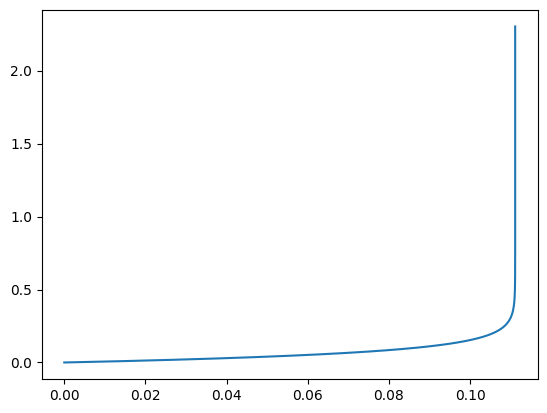

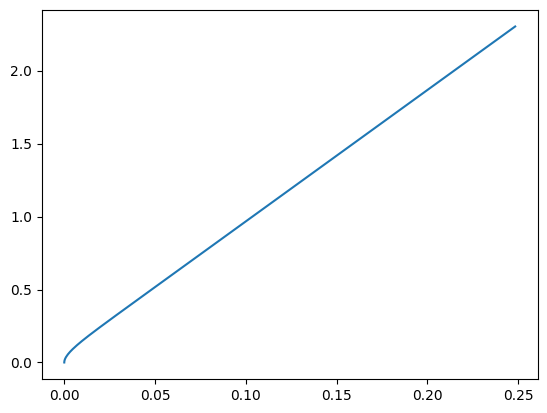

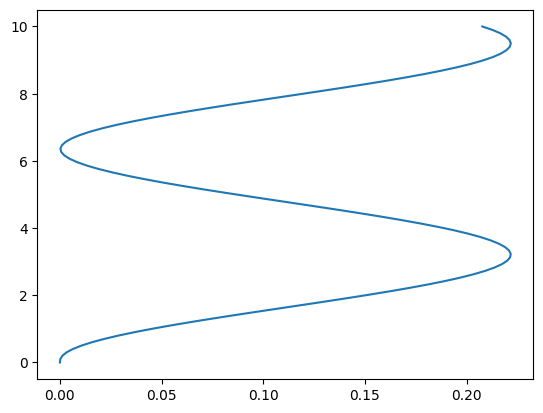

The final value of the the rolling steady-state error in the impulsive input case is 0.11111


In [18]:
# extracting the rolling dynamics
A_rolling = sp.zeros(2, 2)
A_rolling[0,0]=A_eval[8,8]
A_rolling[0,1]=A_eval[8,11]
A_rolling[1,0]=A_eval[11,8]
A_rolling[1,1]=A_eval[11,11]

B_rolling = sp.zeros(2, 1)
B_rolling[0,0]=B_eval[8,3]
B_rolling[1,0]=B_eval[11,3]*5*10**-5

C_rolling = sp.zeros(1,2)
C_rolling[0,0] = C[3,8]
C_rolling[0,1] = C[3,11]

D_rolling = sp.zeros(1,1)

sys_rolling = ct.ss(A_rolling, B_rolling, C_rolling, D_rolling)

# plot impulse response
plt.figure()
t_impulse,y_impulse = ct.impulse_response(sys_rolling)
plt.plot(y_impulse, t_impulse)
plt.show()


# plot step response
t_step,y_step = ct.step_response(sys_rolling)
plt.figure()
plt.plot(y_step, t_step)
plt.show()

T_sin = np.linspace(0, 10, 100)
U_sin = np.sin(T_sin)

plt.figure()
plt.plot(y_sin, t_sin)
plt.show()

# plot sinusoidal response
t_sin,y_sin = ct.forced_response(sys_rolling, T=T_sin, U=U_sin)


# show the final value of the impulse response
print('The final value of the the rolling steady-state error in the impulsive input case is %.5f' % y_impulse[-1])

<br>

<b> Code fragment for T1.4 proportional control </b>

In [ ]:
def proportional_control(A,B,C,D,k):
    # A,B,C,D: system matrices; k: feedback gain
    # extracting the rolling dynamics
    A_rolling = ...
    B_rolling = ...
    ...
    A_rolling_closed_loop = ...

    print("\n When the gain k is %.3f, the results are as follows." % k)
        
    # Bode plot
    ...
    
    # initial condition response
    t_pc, y_pc = ...

    
# normal case 
proportional_control(A,B,C,D,...)
# choose a stabilizing gain
...
# choose a non-stabilizing gain
...